<a href="https://colab.research.google.com/github/Egg-Lord/CCMACLRL_EXAM_COM232/blob/main/Exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4: Hate Speech Classification using Multinomial Naive Bayes

Instructions:
- You do not need to split your data. Use the training, validation and test sets provided below.
- Use Multinomial Naive Bayes to train a model that can classify if a sentence is a hate speech or non-hate speech
- A sentence with a label of zero (0) is classified as non-hate speech
- A sentence with a label of one (1) is classified as a hate speech

Apply text pre-processing techniques such as
- Converting to lowercase
- Stop word Removal
- Removal of digits, special characters
- Stemming or Lemmatization but not both
- Count Vectorizer or TF-IDF Vectorizer but not both

Evaluate your model by:
- Providing input by yourself
- Creating a Confusion Matrix
- Calculating the Accuracy, Precision, Recall and F1-Score

In [ ]:
import pandas as pd

In [ ]:
splits = {'train': 'unique_train_dataset.csv', 'validation': 'unique_validation_dataset.csv', 'test': 'unique_test_dataset.csv'}

**Training Set**

Use this to train your model

In [ ]:
df_train = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["train"])

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


**Validation Set**

Use this set to evaluate your model

In [ ]:
df_validation = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["validation"])

**Test Set**
  
Use this set to test your model

In [ ]:
df_test = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["test"])

## A. Understanding your training data

1. Check the first 10 rows of the training dataset

In [ ]:
df_train.sample(10)

,text,label
1718,Let Leni Lead laban leni,1
678,Unshaded votes and votes for Mayor Duterte goe...,1
8230,Bobo daw si VP Leni pero yung OVP initiatives ...,1
16014,Let Leni Lead : / : From ZeroColors,0
16044,Pag lumabas Ad ni Binay napapa PUTANG INA ako ...,1
15557,robert on a break [USERNAME] [USERNAME] and [U...,1
8694,Magtulong tulong sana at magkaisa ang taumbaya...,1
948,Coronation of Mar Roxas as Datu of Lanao del S...,1
9691,Kala ko pa naman kakampink ka[USERNAME],0
5778,Chazz [USERNAME] [USERNAME] [USERNAME]andother...,0


2. Check how many rows and columns are in the training dataset using `.info()`

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21773 entries, 0 to 21772
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    21773 non-null  object
 1   label   21773 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 340.3+ KB


3. Check for NaN values

In [ ]:
df_train.isnull().sum()

,0
text,0
label,0


4. Check for duplicate rows

In [ ]:
df_train.duplicated().sum()

np.int64(0)

5. Check how many rows belong to each class

In [ ]:
df_train['label'].value_counts()

,count
label,
1,10994
0,10779


## B. Text pre-processing

6. Remove duplicate rows

In [ ]:
df_train.drop_duplicates(inplace=True)
df_train.duplicated().sum()

np.int64(0)

7. Remove rows with NaN values

In [ ]:
df_train.dropna(inplace=True)
df_train.isnull().sum()

,0
text,0
label,0


8. Convert all text to lowercase

In [ ]:
df_train['text'] = df_train['text'].str.lower()
df_train.head()

,text,label
0,presidential candidate mar roxas implies that ...,1
1,parang may mali na sumunod ang patalastas ng n...,1
2,bet ko. pula ang kulay ng posas,1
3,[username] kakampink,0
4,bakit parang tahimik ang mga pink about doc wi...,1


9. Remove digits, URLS and special characters

In [ ]:
import re
def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

df_train['text'] = df_train['text'].apply(clean_text)
df_train.head()

,text,label
0,presidential candidate mar roxas implies that ...,1
1,parang may mali na sumunod ang patalastas ng n...,1
2,bet ko pula ang kulay ng posas,1
3,username kakampink,0
4,bakit parang tahimik ang mga pink about doc wi...,1


10. Remove stop words

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

df_train['text'] = df_train['text'].apply(remove_stopwords)
df_train.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,text,label
0,presidential candidate mar roxas implies govt ...,1
1,parang may mali na sumunod ang patalastas ng n...,1
2,bet ko pula ang kulay ng posas,1
3,username kakampink,0
4,bakit parang tahimik ang mga pink doc willie o...,1


11. Use Stemming or Lemmatization

In [ ]:
from nltk.stem import PorterStemmer
import nltk

nltk.download('punkt')
stemmer = PorterStemmer()

def stem_text(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

df_train['text'] = df_train['text'].apply(stem_text)
df_train.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,text,label
0,presidenti candid mar roxa impli govt liabl la...,1
1,parang may mali na sumunod ang patalasta ng ne...,1
2,bet ko pula ang kulay ng posa,1
3,usernam kakampink,0
4,bakit parang tahimik ang mga pink doc willi on...,1


## C. Training your model

12. Put all text training data in variable **X_train**

In [ ]:
X_train = df_train['text']

13. Put all training data labels in variable **y_train**

In [ ]:
y_train = df_train['label']

14. Use `CountVectorizer()` or `TfidfVectorizer()` to convert text data to its numerical form.

Put the converted data to **X_train_transformed** variable

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)

15. Create an instance of `MultinomalNB()`

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

16. Train the model using `.fit()`

In [ ]:
model.fit(X_train_transformed, y_train)

MultinomialNB()

## D. Evaluate your model

17. Use `.predict()` to generate model predictions using the **validation dataset**


- Put all text validation data in **X_validation** variable

- Convert **X_validation** to its numerical form.

- Put the converted data to **X_validation_transformed**

- Put all predictions in **y_validation_pred** variable

In [ ]:
X_validation = df_validation['text']
X_validation_transformed = vectorizer.transform(X_validation)
y_validation_pred = model.predict(X_validation_transformed)

18. Get the Accuracy, Precision, Recall and F1-Score of the model using the **validation dataset**

- Put all validation data labels in **y_validation** variable

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_validation = df_validation['label']
accuracy = accuracy_score(y_validation, y_validation_pred)
precision = precision_score(y_validation, y_validation_pred)
recall = recall_score(y_validation, y_validation_pred)
f1 = f1_score(y_validation, y_validation_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.8228571428571428
Precision: 0.7917460317460318
Recall: 0.8812720848056537
F1-Score: 0.834113712374582


19. Create a confusion matrix using the **validation dataset**

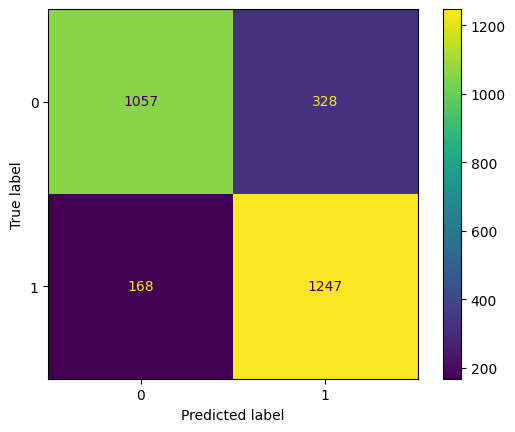

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_validation, y_validation_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

20. Use `.predict()` to generate the model predictions using the **test dataset**


- Put all text validation data in **X_test** variable

- Convert **X_test** to its numerical form.

- Put the converted data to **X_test_transformed**

- Put all predictions in **y_test_pred** variable

In [ ]:
X_test = df_test['text']
X_test_transformed = vectorizer.transform(X_test)
y_test_pred = model.predict(X_test_transformed)

21. Get the Accuracy, Precision, Recall and F1-Score of the model using the **test dataset**

- Put all test data labels in **y_validation** variable



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_test = df_test['label']
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1-Score: {f1_test}")

Accuracy: 0.8227758007117437
Precision: 0.7914507772020726
Recall: 0.8741058655221745
F1-Score: 0.8307273963290279


22. Create a confusion matrix using the **test dataset**

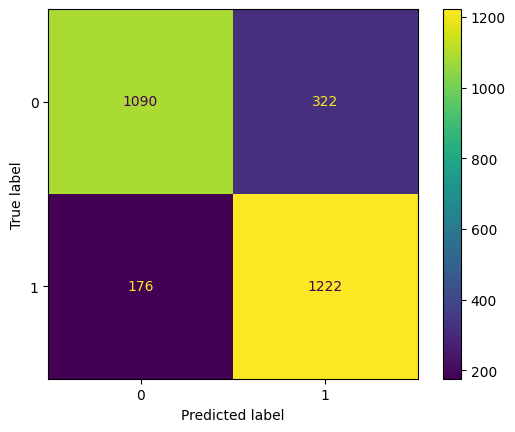

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot()
plt.show()

## E. Test the model

23. Test the model by providing a non-hate speech input. The model should predict it as 0

In [ ]:
non_hate_speech_input = "This is a beautiful day."

processed_input = clean_text(non_hate_speech_input)
processed_input = remove_stopwords(processed_input)
processed_input = stem_text(processed_input)

input_transformed = vectorizer.transform([processed_input])
prediction = model.predict(input_transformed)

print(f"Input: '{non_hate_speech_input}'")
print(f"Processed Input: '{processed_input}'")
print(f"Predicted label: {prediction[0]}")

Input: 'This is a beautiful day.'
Processed Input: 'thi beauti day'
Predicted label: 0


24. Test the model by providing a hate speech input. The model should predict it as 1

In [ ]:
hate_speech_input = "Sana all baliw Robin"

processed_input = clean_text(hate_speech_input)
processed_input = remove_stopwords(processed_input)
processed_input = stem_text(processed_input)

input_transformed = vectorizer.transform([processed_input])
prediction = model.predict(input_transformed)

print(f"Input: '{hate_speech_input}'")
print(f"Processed Input: '{processed_input}'")
print(f"Predicted label: {prediction[0]}")

Input: 'Sana all baliw Robin'
Processed Input: 'sana baliw robin'
Predicted label: 1
